## SyriaTel Customer Churn Prediction

## Business Understanding



Customer churn, the rate at which customers stop doing business with a company, is a critical metric for telecommunication companies. Churn can negatively impact revenue, customer lifetime value, and brand reputation. Therefore, predicting customer churn is essential for effective customer retention strategies.

The telecom provider SyriaTel wants to minimize revenue loss from client attrition. SyriaTel can enhance customer satisfaction and retain consumers by implementing focused retention methods aimed at identifying high-risk clients.

I have been tasked with  building a binary classification model to predict whether a SyriaTel customer will churn,i.e stop doing businesss in the near future.


## Business Objectives

Below are the objectives for the prediction model

1.  Determine which customers are at danger of churning: Make an accurate guess as to which ones are most likely to cut off service.

2.  Put focused retention methods into practice: Create specialized marketing strategies to speak to the unique requirements of at-risk clients and persuade them to stick with SyriaTel.

3.  Boost client contentment Improve the whole customer experience to lower attrition and increase steadfast loyalty.

4.  Efficient resource allocation can be achieved by concentrating retention efforts on customers who are most likely to leave.

## Data Mining Objectives

Create a categorization model using pertinent customer qualities and past data that can reliably forecast client attrition. It should be possible for the model to distinguish between clients who are likely to churn and those who are not.

## Data Loading And Understanding

This project makes use of the SyriaTel dataset,obtained from kaggle which is a platform for data scientists that offers a vast repository of public data sets.https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset. 



## Importing relevant libraries

In [1]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing our data
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Phase 3 Project\Phase-3-Project\Syria tel data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Checking our data

In [3]:
df.shape #checking the shape of our data set

(3333, 21)

In [4]:
df.columns #checking the column names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

We have 21 column names

### Understanding the various column names

Below are the columns and their meaning.

 1. State: this  indicates the customer's geographic location
 2. Account Length: this indicates the duration that the customer has held their account
 3. Area Code: this is the customer's phone number
 4. Phone Number: this is typically a unique identifier for customers
 5. International Plan: this is a binary variable that indicates whether the customer has an international calling plan
 6. Voice Mail Plan: This is a binary variable that indicates whether the customer has a voicemail plan
 7. Number Vmail Messages: this is the number of voicemail messages that the customer has received 
 8. Total Day Minutes, Total Day Calls, Total Day Charge: These columns reflect the customer's usage during the day
 9. Total Eve Minutes, Total Eve Calls, Total Eve Charge: These columns reflect the customer's usage in the evening
 10. Total Night Minutes, Total Night Calls, Total Night Charge: These columns reflect the customer's usage at night
 11. Total Intl Minutes, Total Intl Calls, Total Intl Charge: These columns correspond to the customer's usage abroad
 12. Customer Service Calls: The quantity of calls made by the customer
 13. Churn: This is the target variable that indicates whether a customer has churned (1) or not (0); all other columns are potential features for modeling.

In [5]:
df.describe() #data description

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Understand the information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.isna().sum()#checking for any null values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values in our data set

In [8]:
df.select_dtypes('object')#checking our columns with object data type 

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


4 Columns have the object data type

In [9]:
df.select_dtypes('int64') #checking columns with integer data type

,account length,area code,number vmail messages,total day calls,total eve calls,total night calls,total intl calls,customer service calls
0,128,415,25,110,99,91,3,1
1,107,415,26,123,103,103,3,1
2,137,415,0,114,110,104,5,0
3,84,408,0,71,88,89,7,2
4,75,415,0,113,122,121,3,3
...,...,...,...,...,...,...,...,...
3328,192,415,36,77,126,83,6,2
3329,68,415,0,57,55,123,4,3
3330,28,510,0,109,58,91,6,2
3331,184,510,0,105,84,137,10,2


8 columns have the integer data type

In [10]:
df.select_dtypes('float64') #checking for float data types

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
...,...,...,...,...,...,...,...,...
3328,156.2,26.55,215.5,18.32,279.1,12.56,9.9,2.67
3329,231.1,39.29,153.4,13.04,191.3,8.61,9.6,2.59
3330,180.8,30.74,288.8,24.55,191.9,8.64,14.1,3.81
3331,213.8,36.35,159.6,13.57,139.2,6.26,5.0,1.35


In [11]:
df.select_dtypes('bool') #checking columns with boolean data type

,churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


only one colum -Churn is of boolean data type

## Finding 1: Converting data type

After reviewing the data, I discovered a significant problem with the data type pertaining to the 'area code' column. Despite being represented in the dataset as an integer, the values it includes are simply labels or placeholders rather than actual values with mathematical significance. In order to mitigate any potential disruptions to my predictive modeling procedure, I have made the conversion of this column to a string data type. I may be certain that the 'region code' column is regarded as a categorical variable devoid of numerical meaning by taking this action. This conversion helps to eliminate any misunderstanding of the "area code" as a quantitative attribute, which is especially important when the predictive model depends on numerical inputs.

In [17]:
# Convert the 'area code' column to an object (string) column
df['area code'] = df['area code'].astype(str)
df.select_dtypes('object')

,state,area code,phone number,international plan,voice mail plan
0,KS,415,382-4657,no,yes
1,OH,415,371-7191,no,yes
2,NJ,415,358-1921,no,no
3,OH,408,375-9999,yes,no
4,OK,415,330-6626,yes,no
...,...,...,...,...,...
3328,AZ,415,414-4276,no,yes
3329,WV,415,370-3271,no,no
3330,RI,510,328-8230,no,no
3331,CT,510,364-6381,yes,no


In [13]:
# Check for the unique values
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [18]:
df.duplicated().sum() # checking for any duplicates in our dataset

0

In [16]:
# Plot a heatmap to check how the columns are correlated
plt.rcParams['figure.figsize'] = (30, 7)  
sns.heatmap(df.corr(), annot=True)
plt.show()


ValueError: could not convert string to float: 'KS'

## Finding 2: High correlation - Multicollinearity

From the heatmap representation a number of the columns have strong correlations with one another. This finding suggests that our dataset's independent variables are closely connected, a phenomenon known as multicollinearity.Which can make it difficult to identify the distinct influence of each independent variable on the dependent variable. This problem may lead to overfitting, especially when using Logistic Regression, which is susceptible to multicollinearity.

It will be essential to take particular actions to handle multicollinearity in my modeling process in order to solve this risk. To be able to take care of this multicollinearity,i will employ the use of several strategies like feature selection, dimensionality reduction, or regularization. By doing this, I can make sure that my models offer accurate insights into the relationships between my independent and dependent variables and improve their  reliability.


Histograms of numerical features 

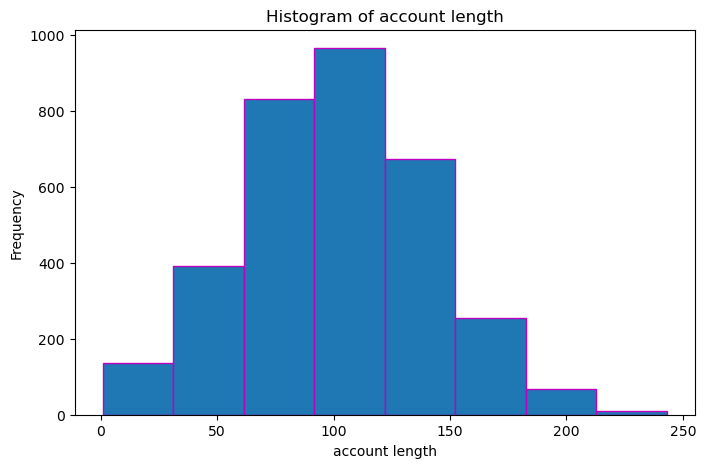

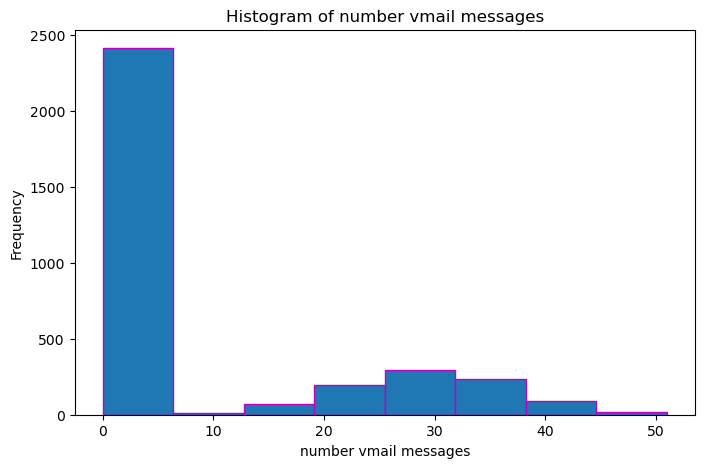

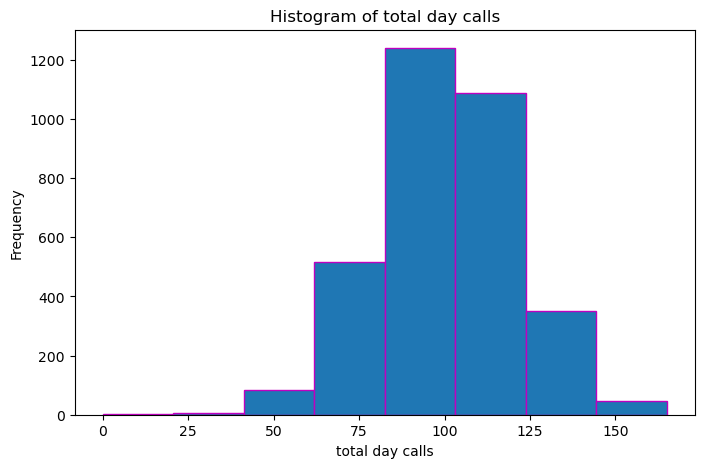

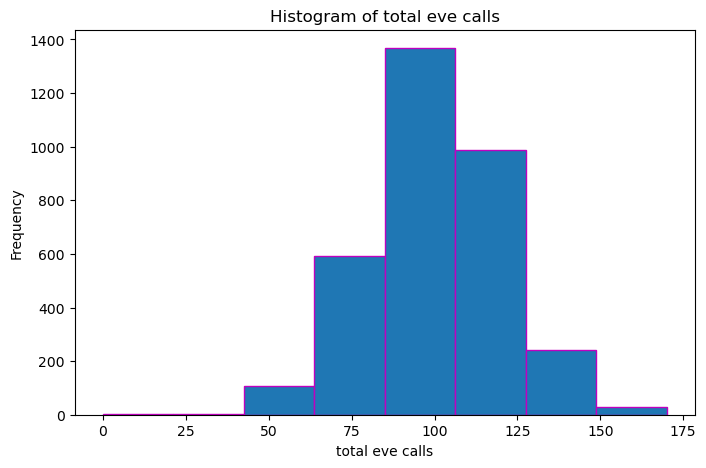

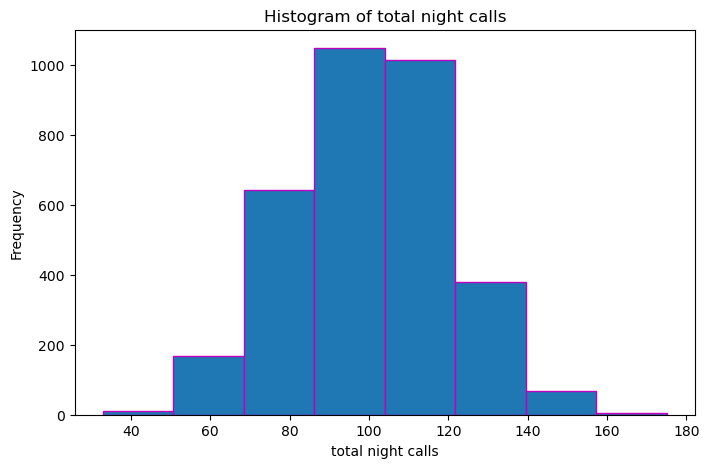

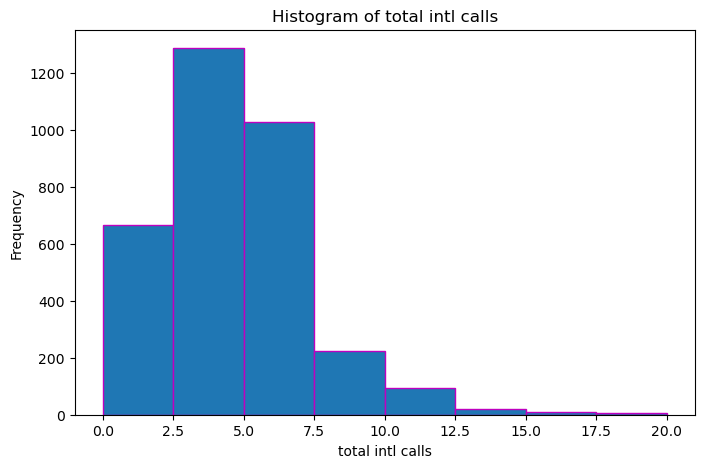

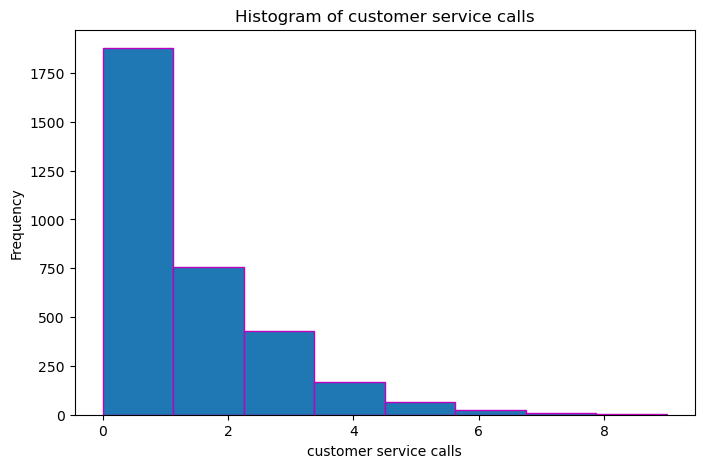

In [19]:
# Plot Histograms for numerical features to visualize their distribution

numerical_features = df.select_dtypes('int64', 'float64')
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.hist(df[feature], bins=8, edgecolor='m', )  # Customize the number of bins
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Boxplots to check for outliers

In [ ]:
# Box plots to identify outliers and visualize the spread of data.
numerical_features = df.select_dtypes('int64', 'float64')

for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.boxplot(df[feature], vert=False)  # Create a horizontal box plot
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


Finding 3: Outliers

The boxplots in my study of the data show that there are a considerable number of outliers in my  data.Meaning the model will be impacted by this outliers. 

The outliers in this case however are not  abnormalities that need to be eliminated. Rather, they represent a significant feature of the dataset that l should take into consideration while modeling. 

They provide useful information that is pertinent to my analysis. 

Ensuring the robustness and correctness of the data requires an understanding of the nature and impact of these outliers.

Bar charts for categorical features

In [ ]:
# Bar charts for categorical features to show the frequency of each category.
categorical_features = ['area code','international plan', 'voice mail plan','churn']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    df[feature].value_counts().plot(kind='bar', edgecolor='k')  # Create the bar chart
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Create scatter plots for the selected numerical features.
feature1 = 'total day minutes'
feature2 = 'total night minutes'

plt.figure(figsize=(8, 5))  # Set the figure size
plt.scatter(df[feature1], df[feature2], alpha=0.5)  # Create the scatter plot
plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

feature3 = 'total day charge'
feature4 = 'total day minutes'

plt.figure(figsize=(8, 5))  # Set the figure size
plt.scatter(df[feature3], df[feature4], alpha=0.5)  # Create the scatter plot
plt.title(f'Scatter Plot of {feature3} vs. {feature4}')
plt.xlabel(feature3)
plt.ylabel(feature4)
plt.show()

## Finding 4: Scatter plots showing multicollinearity

It is evident from my examination of the scatter plots that certain features have a perfect link with one another. The state of multicollinearity, in this case affects the model which can also produce less trustworthy statistical conclusions.


I must act appropriately to reduce the influence of multicollinearity in my model.I will employ techniques like feature selection, dimensionality reduction, and regularization . By using these techniques, l may strengthen my model's interpretability and robustness and make sure it provides reliable and accurate statistical insights.while addressing the challenges posed by multicollinearity.

## 3. Data Preparation

step 1: Removing irrelevant columns

Given that my dataset does not contain any missing values and duplicates, the next step is to streamline my data by removing columns that are not essential for my analysis or modeling. This process of column removal is crucial for several reasons:

Dimensionality Reduction: By eliminating unnecessary columns, I can reduce the dimensionality of my data. This simplification can lead to faster model training and improved model interpretability.

Efficiency: Removing non-essential columns enhances the efficiency of data processing and model training. It reduces computational demands, making our workflow more efficient.

Model Performance: Unnecessary columns can introduce noise into my analysis and modeling, potentially leading to less accurate results. Eliminating such columns can result in a cleaner and more focused dataset.

Creating a new data frame

In [ ]:
# Create a new dataframe with the updated columns
df2 = df.drop(['phone number', 'state', 'area code'], axis=1)
df2

Why drop these columns:

(i) phone number- serves as a unique identifier for customers but is unlikely to be a predictive feature for churn.

(ii) Including state- as a feature in a churn prediction model can introduce challenges. If treated as a categorical feature, it can lead to a high number of dummy variables (one-hot encoding) or require specific encoding strategies, potentially increasing the dimensionality of the dataset.

(ii) area code - This is less likely to have a direct impact on churn. It is typically an identifier and may not be a strong predictor.

## Step 2. Feature Engineering

In the dataset, I have identified that both the target variable and certain feature columns are categorical in nature. To effectively use this data in the modeling process, it is advisable to encode these categorical variables into a numerical format.

In [ ]:
df2.select_dtypes(include=['object','bool'])#selecting object and boolean data types

## Finding 5: Encoding

Since many machine learning techniques require numerical inputs for model training, encoding categorical variables is an important first step.

Through the application of suitable encoding methods, like label encoding or one-hot encoding, I will translate the categorical data into a numerical format that the model can comprehend. By encoding the data, I can make sure that the machine learning algorithms can use the information in these categorical columns to make more accurate and dependable model predictions throughout the modeling phase.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical columns
df2['churn_encoded'] = label_encoder.fit_transform(df2['churn'])
df2['international_plan_encoded'] = label_encoder.fit_transform(df2['international plan'])
df2['voice_mail_plan_encoded'] = label_encoder.fit_transform(df2['voice mail plan'])

# The 'churn', 'international plan', and 'voice mail plan' columns have been encoded into new columns
df2

In [ ]:
print(df2['churn'].value_counts())
print(df2['churn_encoded'].value_counts())
print(df2['churn_encoded'].value_counts(normalize=True))

## Finding 6: Imbalanced data

The 'churn' column denotes a binary result, where 'True' denotes customers who departed and 'False' indicates customers that did not churn.

The column labeled 'churn_encoded' provides a numerical representation of 'churn,' with 0 generally denoting 'False,' and 1 marking 'True.'

The data is split roughly in half: 85.51% of the data fall into the 'False' or 0 category, and 14.49% of the data fall into the 'True' or 1 category. This suggests that there may be an imbalance in the dataset, with a larger percentage of non-churned clients.


## Step 3. Choosing the Target and the Features

In [ ]:
df2.columns

In [ ]:
df2.info()

In [ ]:
# Assign X to the selected features / Independent variables
features = df2.select_dtypes(include=['int64', 'float64','int32']).drop('churn_encoded', axis=1)

# Assign y to the target 'churn_encoded' / Dependent variable
X = features
y = df2['churn_encoded']

## 4. Modeling

Build a predictive algorithm that can forecast when a client could be about to stop doing business with Syria. The principal aim is to mitigate monetary losses resulting from clients who have a great relationship with the organization.


## Model 1: Logistic Regression

# Step 1: Consider the aforementioned conclusions

Prior to developing the Logistic Regression model, it is crucial to take into consideration the following results, since they have the potential to greatly affect the accuracy and dependability of the model:

Outliers: These anomalies may have an effect on the way the model works. It's crucial to remember that these outliers in this instance are not abnormalities that need to be eliminated. Rather, they represent a significant feature of the dataset that  should taken into consideration while modeling.

Multicollinearity: When strongly correlated independent variables are present, our regression model's coefficients may become unstable and become less interpretable. For reliable results, multicollinearity problems must be fixed.

Imbalanced Data: A skewed model's performance may result from imbalanced data, which occurs when one class significantly dominates the other in the target variable. In order to avoid biased predictions and guarantee a well-rounded regression model, class imbalance must be addressed.



# 1. Handling Multicollinearity 

Correlated columns, such as "total day minutes" and "total day charge," provide the same information, so including both in the dataset adds no value to the research or modeling. Including the 'total day minutes' variable is easier because it shows the customer's actual behavior (minutes utilized) instead of a derived value (charge). This also holds true for the terms "total day charge," "total eve charge," "total night charge," and "total intl charge."


In [ ]:
# Assign X to the selected new_features / Independent variables
new_features = df2.select_dtypes(include=['int64', 'float64', 'int32']).drop(['churn_encoded','total day charge','total day charge',
                                                                    'total eve charge', 'total night charge',
                                                                    'total intl charge'], axis=1)

# Assign y to the target 'churn_encoded' / Dependent variable
new_X = new_features
new_X
y = df2['churn_encoded']

## 2. Handling Class Imbalance with SMOTE

The data is split roughly in half: 85.51% of the data fall into the 'False' or 0 category, and 14.49% of the data fall into the 'True' or 1 category. This suggests that there may be an imbalance in the dataset, with a larger percentage of non-churned clients. To solve the problem in this instance, I will employ the Synthetic Minority Over-sampling Technique, or SMOTE. Through the creation of duplicates,this increases the number of cases in the minority class.

In [ ]:
# Class to perform over-sampling using SMOTE.
# Import the necessary library
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with desired sampling strategy (you can set the ratio or choose 'auto')
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(new_X, y)

# X_resampled and y_resampled contain the oversampled data

# You can use X_resampled and y_resampled to train your model
# Then, test it on the original testing data (X_test, y_test) for evaluation

## Step 2. Scale the Data

This is to ensure that the features are on a common scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Step 3. Perform a train-test split

Divide the dataset into sets for testing and training. This division guarantees that the data used to train the model and the data required to assess its performance may be distinguished clearly from one another.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into a training set of 80% and a testing set of 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

## Step 4. Build and evaluate a baseline model


After applying SMOTE,let's proceed to train a machine learning model on the resampled training data using X_resampled and y_resampled. In this case logistic regression model will be used.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate your machine learning model
model = LogisticRegression(max_iter=1000)

# Train the model on the resampled training data
model.fit(X_scaled, y_resampled)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: The model's accuracy, or the percentage of right predictions among all the forecasts, is roughly 74.39%.

Precision: The precision is approximately 72.03%, meaning that 72.03% of the time the model is right when it predicts the positive class. It illustrates how well the model can anticipate favorable outcomes.

Recall: The model accurately detects roughly 77.48% of the real positive cases, or a recall of roughly 77.48%. It gauges how well the model can represent positive cases.

F1 Score: Approximately 74.65% is the F1 score. It is a balance between the two metrics and is the harmonic mean of recall and precision.

ROC AUC Score: Approximately 74.47% is the ROC AUC score. This score assesses the trade-off between true positive rate and false positive rate in the model and is utilized in binary classification issues. It is calculated by measuring the area under the Receiver Operating Characteristic (ROC) curve.

Confusion Matrix: The distribution of true positive, true negative, false positive, and false negative predictions is displayed in the confusion matrix. There are 430 true positives, 167 false positives, 125 false negatives, and 418 true negatives in this instance.
In general, the model does rather well on the test set, striking a mix between recall and precision. These measures show that the model captures a sizable fraction of the real positive cases and is good at producing accurate positive predictions. Nevertheless, depending on your particular needs and goals, more optimization and fine-tuning may be taken into consideration to enhance model performance.


## Model 2: Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

The accuracy of the model is around 91.75%, meaning that most of the test data's instances had their class labels properly predicted.

Classification Report: This report offers a more thorough assessment of the model's functionality.

Precision, recall, and F1-score for the "0" class—possibly the majority class—show that the model performs at roughly 0.95. This shows that it accurately recognizes the majority of genuine "0" cases and generates accurate positive predictions for this class.

The precision, recall, and F1-score for the "1" class—which is likely the minority class—are all lower, at roughly 0.72. Even with its lower precision, it nonetheless accurately detects a significant proportion of real "1" cases.

An overall evaluation of the model's performance is provided by the macro and weighted averages of precision, recall, and F1-score, which give the majority class (weighted average) greater weight.

For an imbalanced dataset, the model seems to be producing results that are rather good, particularly for the majority class.



## Model 3: KNN Classifier

KNN is a non-parametric and instance-based learning algorithm, meaning it doesn't make underlying assumptions about the data distribution and makes predictions based on the similarity between instances.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier with a specified number of neighbors (k)
k = 3
model = KNeighborsClassifier(n_neighbors=k)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy (k={k}): {accuracy}")
print("Classification Report:")
print(report)

The accuracy of the model is around 85.76%, meaning that most of the test data's instances had their class labels properly predicted.

Classification Report: This report offers a more thorough assessment of the model's functionality.

The model exhibits strong precision, recall, and F1-score for the "0" class (which is likely the majority class), suggesting that it accurately detects the majority of actual "0" cases and makes accurate positive predictions for this class.

The precision, recall, and F1-score are lower for the "1" class, which is most likely the minority class. This implies that there is less of a minority class identification capability in the model.

An overall evaluation of the model's performance is provided by the macro and weighted averages of precision, recall, and F1-score, which give the majority class (weighted average) greater weight.

For the majority class, the KNN model is functioning fairly well; but, for the minority class, it is less effective. We can investigate methods to enhance the minority class's performance, such modifying the value of k, taking into account various distance metrics, or addressing class imbalance with methods like resampling.


## 5. Evaluation

The F1 score, accuracy, precision, recall, and balance of the logistic regression model are all rather strong. It retains accuracy while efficiently capturing positive cases. It also has a respectable ROC AUC value.

High accuracy is demonstrated by the decision tree model, particularly for the majority class. For the minority class, it performs worse in terms of F1 score, recall, and precision. This implies that it might not classify the minority class as well. The model works well with datasets that are unbalanced.

Like the decision tree model, the KNN classifier approach performs and accuracy quite well for the majority class but struggles for the minority class.


## Model of Choice: Decision Trees

I decided to utilize the Decision Trees Model out of the models mentioned above.

For both Class 0 and Class 1, the decision tree model's precision, recall, and F1 score were assessed.
The majority of cases in the test data had their class labels properly predicted by the model, as evidenced by the accuracy figures above.

The precision metric holds great significance as it assesses the model's accuracy in identifying the majority class, or consumers who do not experience attrition.

The model's decreased precision, recall, and F1 score for the minority class is a drawback. This implies that it might not categorize the minority class as well as it does the dominant class. However, this is primarily due to the extreme disparity of the data as well. However, this model works far better than the other two.

The model can be used in a real-world situation because it exhibits good precision and recall for both classes on test data.


## 6. Recommendations and Future Investigations

Investigation of Customer Service Calls: Examine more closely to determine why certain clients require frequent interaction with customer service. This will aid in figuring out how to support them more effectively.

High Churn States Analysis: To find any trends or explanations for the high churn rates, examine the states where a large number of customers are departing.

Rewards for High Billing Customers: Look for strategies to keep SyriaTel customers that have high daily fees (over $55). This could entail providing additional bonuses and rewards. It's concerning that all of these high billers are currently quitting.

Rewards for patrons who remain longer than six months:
Seek strategies to reward clients for sticking with the business longer—such as by offering them loyalty points or other incentives—as this will foster a sense of loyalty.




## 7. Conclusion

In conclusion the decision tree model appears to be providing reasonably good results, especially for the majority class, which is typical for imbalanced datasets and is the best option out of the three models built above.